In [7]:
# use ctree library
library(party)

In [8]:
set.seed(1234)

In [16]:
nrow(iris)

[1] 150

In [17]:
ind<-sample(2,nrow(iris),replace=TRUE,prob=c(0.7,0.3))

In [18]:
traindata <- iris[ind ==1,]

In [19]:
testdata<-iris[ind == 2,]

In [24]:
myformula <- Species~Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

In [25]:
iris_ctree <- ctree(myformula,data=traindata)

In [26]:
table(predict(iris_ctree),traindata$Species)

            
             setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         37         3
  virginica       0          1        31

In [28]:
print(iris_ctree)


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  112 

1) Petal.Length <= 1.9; criterion = 1, statistic = 104.643
  2)*  weights = 40 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 48.939
    4) Petal.Length <= 4.4; criterion = 0.974, statistic = 7.397
      5)*  weights = 21 
    4) Petal.Length > 4.4
      6)*  weights = 19 
  3) Petal.Width > 1.7
    7)*  weights = 32 


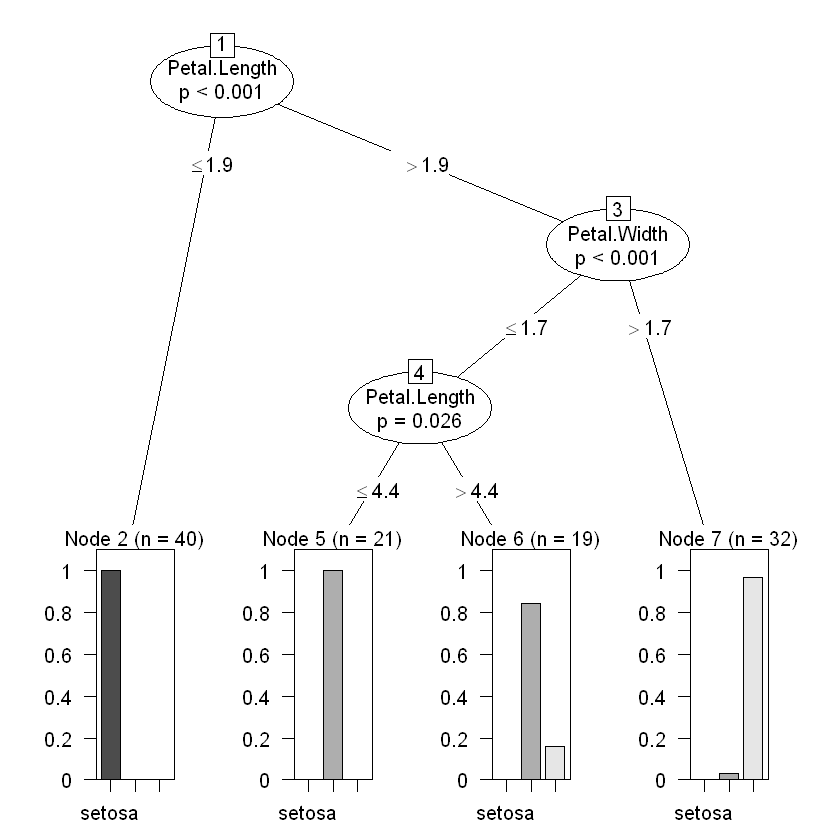

In [27]:
plot(iris_ctree)

In [31]:
testpred <- predict(iris_ctree,newdata=testdata)

In [32]:
table(testpred,testdata$Species)

            
testpred     setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         12         2
  virginica       0          0        14

In [37]:
#use rpart library: allow least predict error tree
#install.packages("rpart")
library(rpart)

In [45]:
library("TH.data")

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:rpart':

    solder

Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked _by_ '.GlobalEnv':

    bodyfat

The following object is masked from 'package:MASS':

    geyser



In [50]:
attributes(bodyfat)

$names
 [1] "age"          "DEXfat"       "waistcirc"    "hipcirc"      "elbowbreadth"
 [6] "kneebreadth"  "anthro3a"     "anthro3b"     "anthro3c"     "anthro4"     

$row.names
 [1] "47"  "48"  "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58" 
[13] "59"  "60"  "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70" 
[25] "71"  "72"  "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82" 
[37] "83"  "84"  "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94" 
[49] "95"  "96"  "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106"
[61] "107" "108" "109" "110" "111" "112" "113" "114" "115" "116" "117"

$class
[1] "data.frame"

In [60]:
set.seed(1234)
ind<-sample(2,nrow(bodyfat),replace=TRUE,prob=c(0.7,0.3))

In [64]:
bodyfat.train<-bodyfat[ind==1,]
bodyfat.test<-bodyfat[ind==2,]

In [71]:
myformula <- DEXfat~age + waistcirc + hipcirc + elbowbreadth + kneebreadth

In [72]:
bodyfat_rpart<-rpart(myformula,data=bodyfat.train,control=rpart.control(minsplit=10))

In [73]:
attributes(bodyfat_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$class
[1] "rpart"

In [77]:
#bodyfat_rpart$cptable
bodyfat_rpart

n= 56 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 56 7265.0290000 30.94589  
   2) waistcirc< 88.4 31  960.5381000 22.55645  
     4) hipcirc< 96.25 14  222.2648000 18.41143  
       8) age< 60.5 9   66.8809600 16.19222 *
       9) age>=60.5 5   31.2769200 22.40600 *
     5) hipcirc>=96.25 17  299.6470000 25.97000  
      10) waistcirc< 77.75 6   30.7345500 22.32500 *
      11) waistcirc>=77.75 11  145.7148000 27.95818  
        22) hipcirc< 99.5 3    0.2568667 23.74667 *
        23) hipcirc>=99.5 8   72.2933500 29.53750 *
   3) waistcirc>=88.4 25 1417.1140000 41.34880  
     6) waistcirc< 104.75 18  330.5792000 38.09111  
      12) hipcirc< 109.9 9   68.9996200 34.37556 *
      13) hipcirc>=109.9 9   13.0832000 41.80667 *
     7) waistcirc>=104.75 7  404.3004000 49.72571 *

In [78]:
bodyfat_rpart$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.67272638,0,1.00000000,1.0194546,0.18724382
2,0.09390665,1,0.32727362,0.4415438,0.10853044
3,0.06037503,2,0.23336696,0.4271241,0.09362895
4,0.03420446,3,0.17299193,0.3842206,0.09030539
5,0.01708278,4,0.13878747,0.3038187,0.07295556
6,0.01695763,5,0.12170469,0.2739808,0.06599642
7,0.01007079,6,0.10474706,0.2693702,0.06613618
8,0.01000000,7,0.09467627,0.2695358,0.06620732


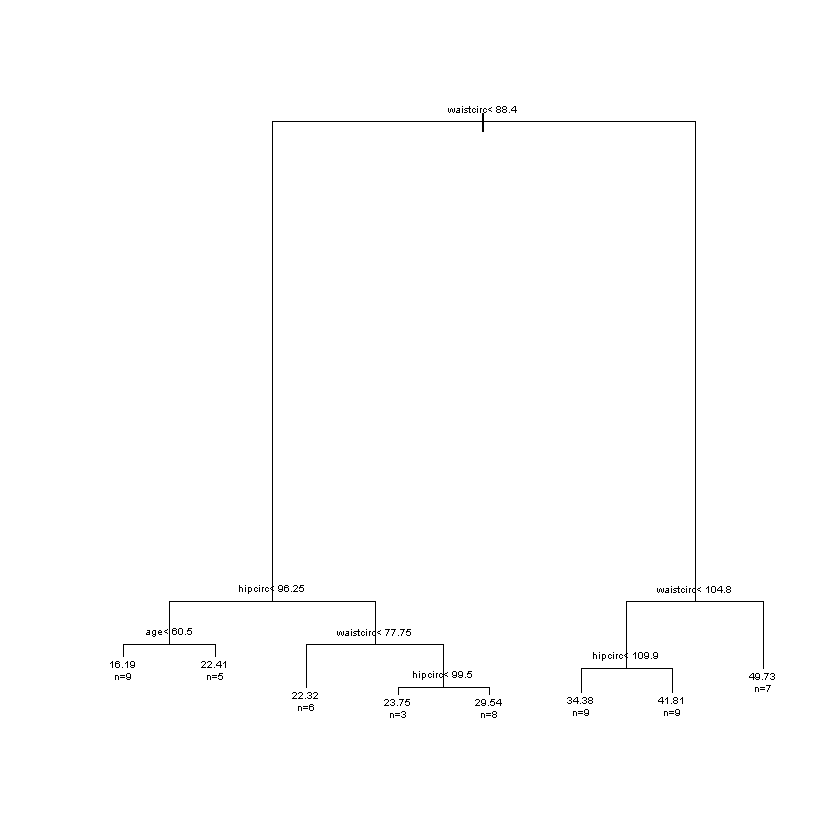

In [85]:
plot(bodyfat_rpart)
text(bodyfat_rpart,use.n=T,cex=0.5)

In [87]:
opt <- which.min(bodyfat_rpart$cptable[,"xerror"])

In [88]:
cp <- bodyfat_rpart$cptable[opt,"CP"]

In [89]:
bodyfat_prune <- prune(bodyfat_rpart,cp)

In [90]:
bodyfat_prune

n= 56 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 56 7265.02900 30.94589  
   2) waistcirc< 88.4 31  960.53810 22.55645  
     4) hipcirc< 96.25 14  222.26480 18.41143  
       8) age< 60.5 9   66.88096 16.19222 *
       9) age>=60.5 5   31.27692 22.40600 *
     5) hipcirc>=96.25 17  299.64700 25.97000  
      10) waistcirc< 77.75 6   30.73455 22.32500 *
      11) waistcirc>=77.75 11  145.71480 27.95818 *
   3) waistcirc>=88.4 25 1417.11400 41.34880  
     6) waistcirc< 104.75 18  330.57920 38.09111  
      12) hipcirc< 109.9 9   68.99962 34.37556 *
      13) hipcirc>=109.9 9   13.08320 41.80667 *
     7) waistcirc>=104.75 7  404.30040 49.72571 *

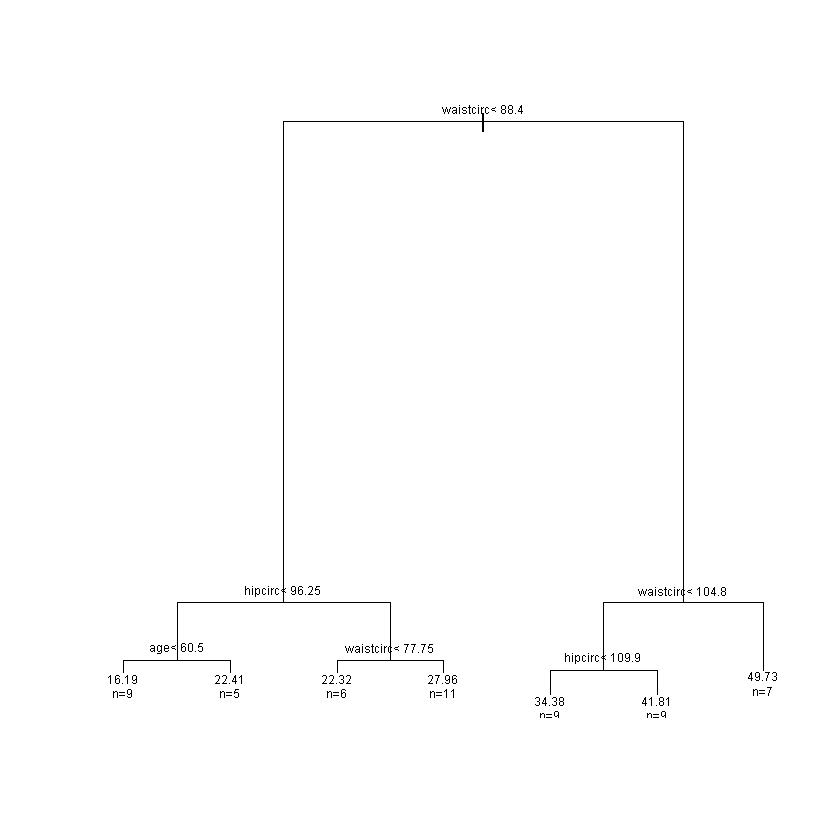

In [93]:
plot(bodyfat_prune)
text(bodyfat_prune,use.n=T,cex=0.6)

In [95]:
head(bodyfat)

,age,DEXfat,waistcirc,hipcirc,elbowbreadth,kneebreadth,anthro3a,anthro3b,anthro3c,anthro4
47,57,41.68,100.0,112.0,7.1,9.4,4.42,4.95,4.50,6.13
48,65,43.29,99.5,116.5,6.5,8.9,4.63,5.01,4.48,6.37
49,59,35.41,96.0,108.5,6.2,8.9,4.12,4.74,4.60,5.82
50,58,22.79,72.0,96.5,6.1,9.2,4.03,4.48,3.91,5.66
51,60,36.42,89.5,100.5,7.1,10.0,4.24,4.68,4.15,5.91
52,61,24.13,83.5,97.0,6.5,8.8,3.55,4.06,3.64,5.14


In [96]:
bodyfat_pred<-predict(bodyfat_prune,newdata=bodyfat.test)

In [97]:
xlim<-range(bodyfat$DEXfat)

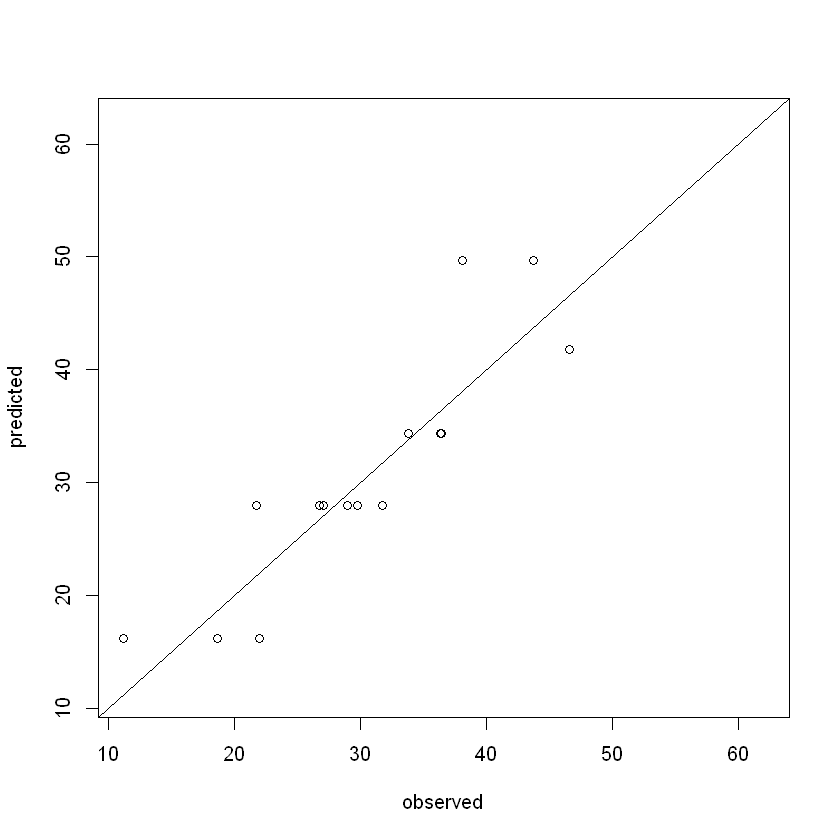

In [100]:
plot(bodyfat_pred~DEXfat,data=bodyfat.test,xlab="observed",ylab="predicted",ylim=xlim,xlim=xlim)
abline(a=0,b=1)

In [107]:
#random forest
library(randomForest)

In [108]:
set.seed(1234)
ind<- sample(2,nrow(iris),replace=T,prob=c(0.7,0.3))
iris.test<-iris[ind==2,]
iris.train<-iris[ind==1,]


In [109]:
rf <- randomForest(Species~., data=iris.train,ntree=100,proximity=T)

In [110]:
table(predict(rf),iris.train$Species)

            
             setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         35         2
  virginica       0          3        32

In [111]:
rf


Call:
 randomForest(formula = Species ~ ., data = iris.train, ntree = 100,      proximity = T) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.46%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         40          0         0  0.00000000
versicolor      0         35         3  0.07894737
virginica       0          2        32  0.05882353

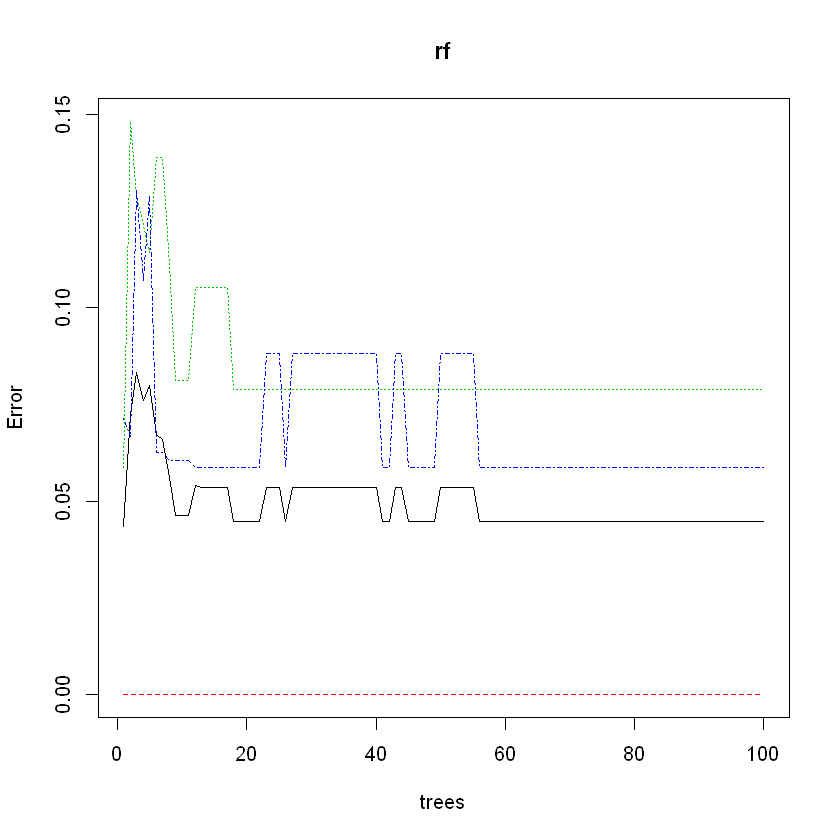

In [112]:
plot(rf)

,MeanDecreaseGini
Sepal.Length,8.129141
Sepal.Width,1.307585
Petal.Length,31.320585
Petal.Width,33.059201


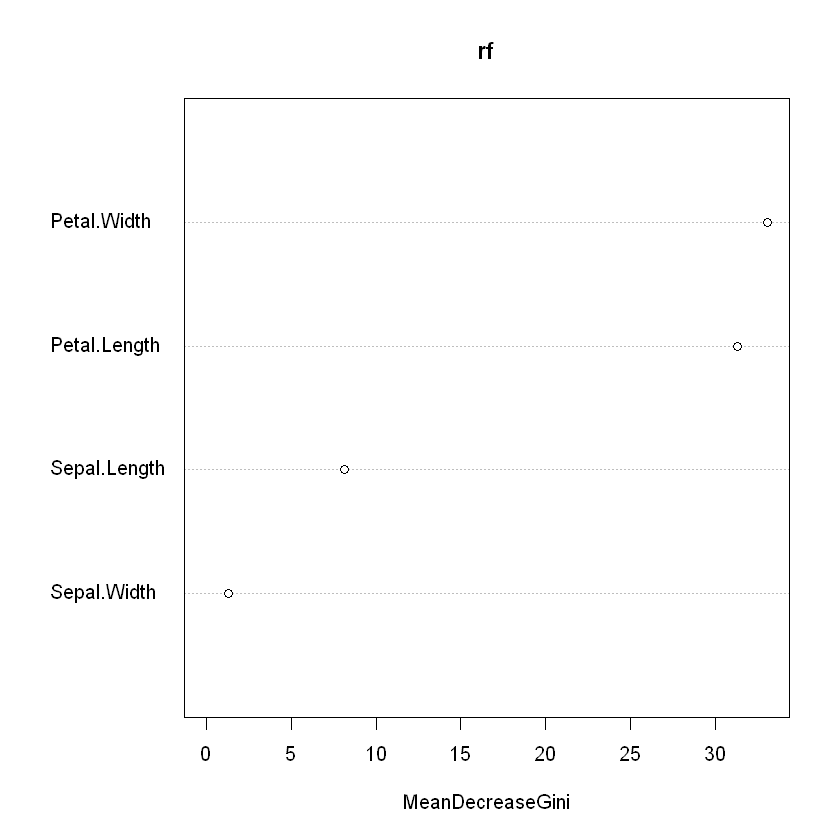

In [115]:
importance(rf)
varImpPlot(rf)

In [116]:
iris.pred<-predict(rf,newdata=iris.test)

In [117]:
table(iris.pred,iris.test$Species)

            
iris.pred    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         12         2
  virginica       0          0        14

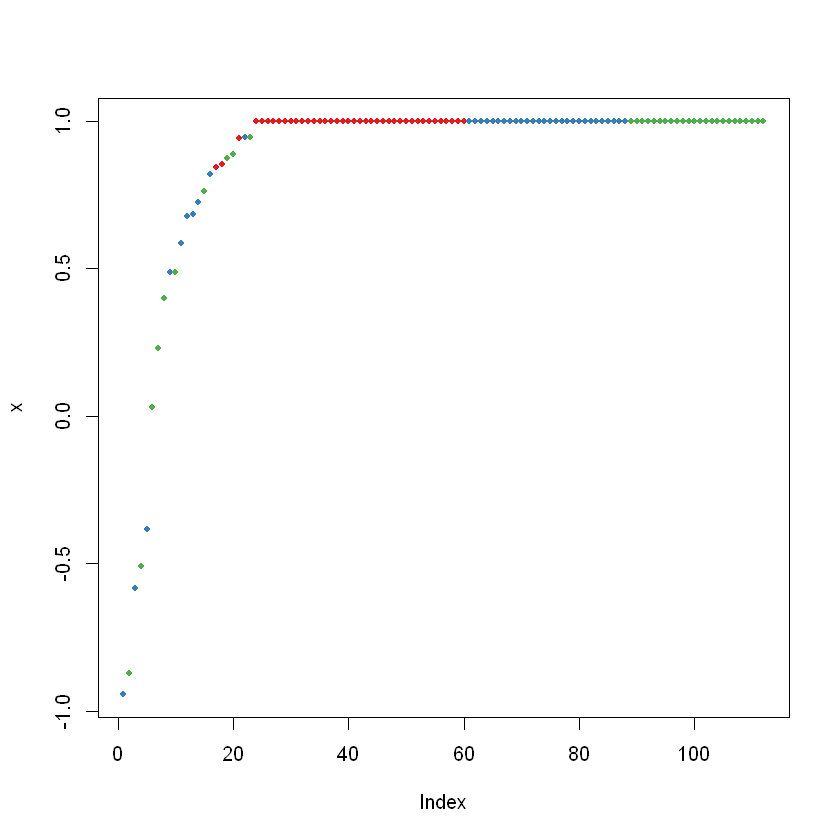

In [118]:
plot(margin(rf,iris.test$Species))

In [ ]:
#MART aka Gradient Boosting 